강의안 출처: 러닝스푼즈_나노디그리3기_파이썬 기초와 시각화_박조은 강사님

## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
# pandas, numpy 라이브러리 로드하기
import pandas as pd
import numpy as np

In [2]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"seoul-covid19-11_28_.csv"
file_name

'seoul-covid19-11_28_.csv'

In [3]:
# read_csv 로 csv 파일을 불러와 주세요.
df=pd.read_csv(file_name)
df.shape

(8652, 7)

In [4]:
# "연번"을 기준으로 역순으로 정렬합니다.
df = df.sort_values("연번", ascending=False)
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [5]:
# head 로 미리보기를 합니다.

df.head()      #head()기본값 5개 

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN


In [6]:
# tail 로 미리보기를 합니다.
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
8651,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


## 시각화 도구 불러오기

<AxesSubplot:title={'center':'한글'}>

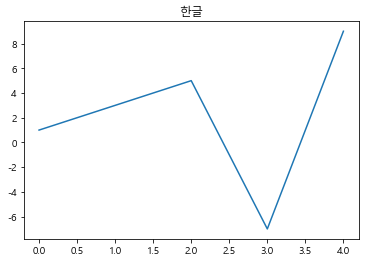

In [13]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.
import matplotlib.pyplot as plt  #matplotlib: 판다스의 시각화 도구 
plt.rc("font", family= "Malgun Gothic")
plt.rc("axes", unicode_minus=False)

pd.Series([1,3,5,-7,9]).plot(title="한글")

### 시각화 선명하게 설정하기

<AxesSubplot:title={'center':'한글'}>

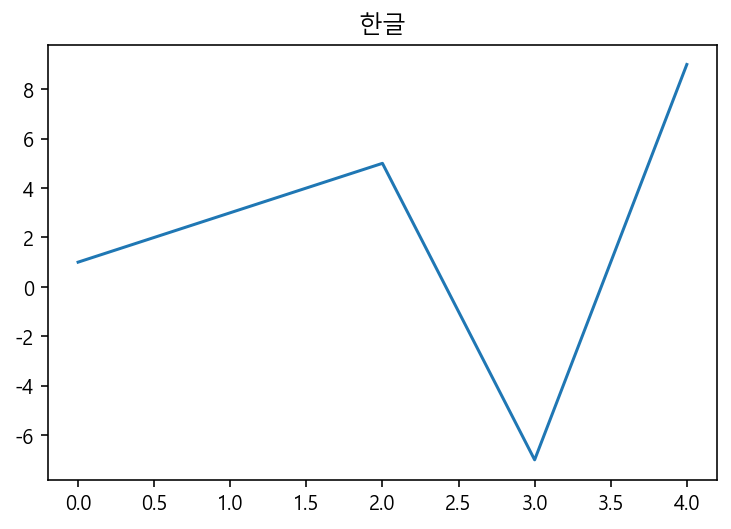

In [15]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

pd.Series([1,3,5,-7,9]).plot(title="한글")

<AxesSubplot:title={'center':'한글'}>

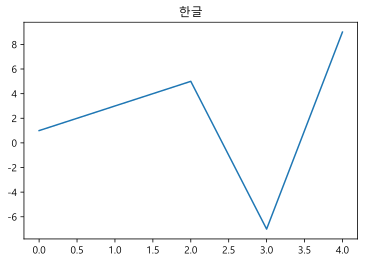

In [31]:
# 그래프 더 크게 :svg

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

pd.Series([1,3,5,-7,9]).plot(title="한글")

In [33]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 확진일

In [17]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
df["확진일"].value_counts().head()

11.25.    212
11.26.    204
11.27.    178
8.29.     167
8.27.     160
Name: 확진일, dtype: int64

In [29]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.
df["확진일"].head()

0    11.28.
1    11.28.
2    11.28.
3    11.28.
4    11.28.
Name: 확진일, dtype: object

In [19]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime("2020." + df["확진일"])
df[["확진일", "확진일자"]].describe()


<ipython-input-19-825c04ae9dfb>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[["확진일", "확진일자"]].describe()


,확진일,확진일자
count,8652,8652
unique,283,281
top,11.25.,2020-11-25 00:00:00
freq,212,212
first,NaN,2020-01-24 00:00:00
last,NaN,2020-11-28 00:00:00


In [22]:
# 월만 추출합니다.

# df["월"]
df["월"] = df["확진일자"].dt.month
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN,2020-11-28,11
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN,2020-11-28,11
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN,2020-11-28,11
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN,2020-11-28,11
...,...,...,...,...,...,...,...,...,...
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1


In [30]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

# df["주"]
df["주"] = df["확진일자"].dt.isocalendar().week
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN,2020-11-28,11,48
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN,2020-11-28,11,48
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
...,...,...,...,...,...,...,...,...,...,...
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

<AxesSubplot:title={'center':'확진일자별 확진자 수'}>

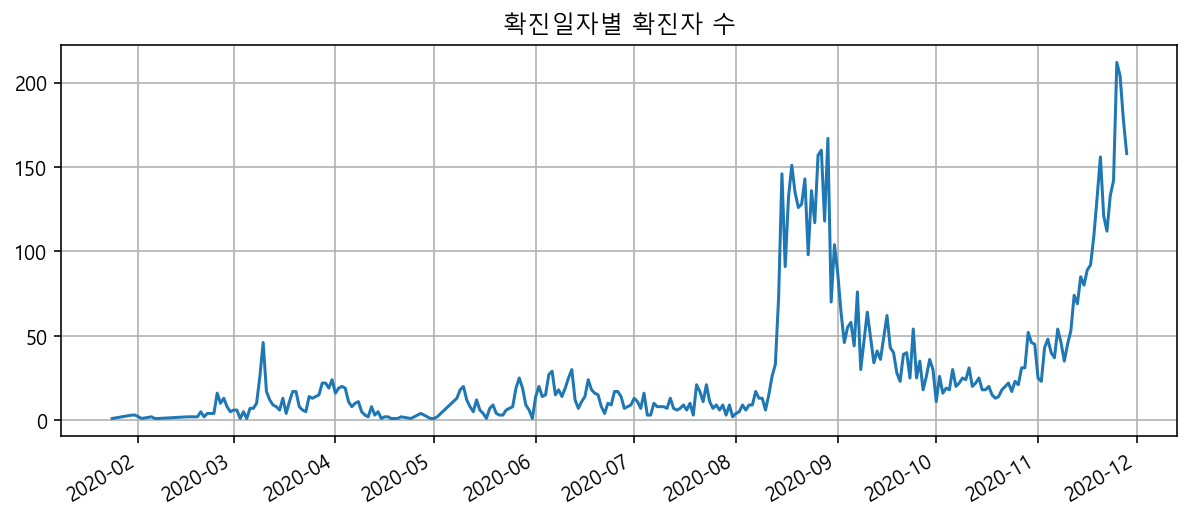

In [34]:
# 확진일자로 선그래프를 그립니다.
df["확진일자"].value_counts().plot(title="확진일자별 확진자 수",
                                   figsize=(10,4),
                                   grid=True)

### 확진자가 가장 많이 나온 날

In [35]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.
df["확진일자"].describe()

<ipython-input-35-e5fd44a8918a>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["확진일자"].describe()


count                    8652
unique                    281
top       2020-11-25 00:00:00
freq                      212
first     2020-01-24 00:00:00
last      2020-11-28 00:00:00
Name: 확진일자, dtype: object

In [36]:
# 확진자가 가장 많았던 날을 찾습니다.
df[df["확진일자"] == "2020-11-25"]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
540,8112,31995,11.25.,타시도,-,기타 확진자 접촉,NaN,2020-11-25,11,48
541,8111,31997,11.25.,타시도,-,중구 소재 보람상조회사 관련,NaN,2020-11-25,11,48
542,8110,32080,11.25.,동작구,-,감염경로 조사중,NaN,2020-11-25,11,48
543,8109,32187,11.25.,중랑구,-,감염경로 조사중,NaN,2020-11-25,11,48
544,8108,32015,11.25.,타시도,-,감염경로 조사중,NaN,2020-11-25,11,48
...,...,...,...,...,...,...,...,...,...,...
747,7905,31868,11.25.,동작구,-,동작구 임용단기고시 관련,NaN,2020-11-25,11,48
748,7904,31823,11.25.,동작구,-,기타 확진자 접촉,NaN,2020-11-25,11,48
749,7903,31882,11.25.,용산구,-,감염경로 조사중,NaN,2020-11-25,11,48
750,7902,31878,11.25.,용산구,-,기타 확진자 접촉,NaN,2020-11-25,11,48


In [ ]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.


### 막대그래프 그리기

<AxesSubplot:>

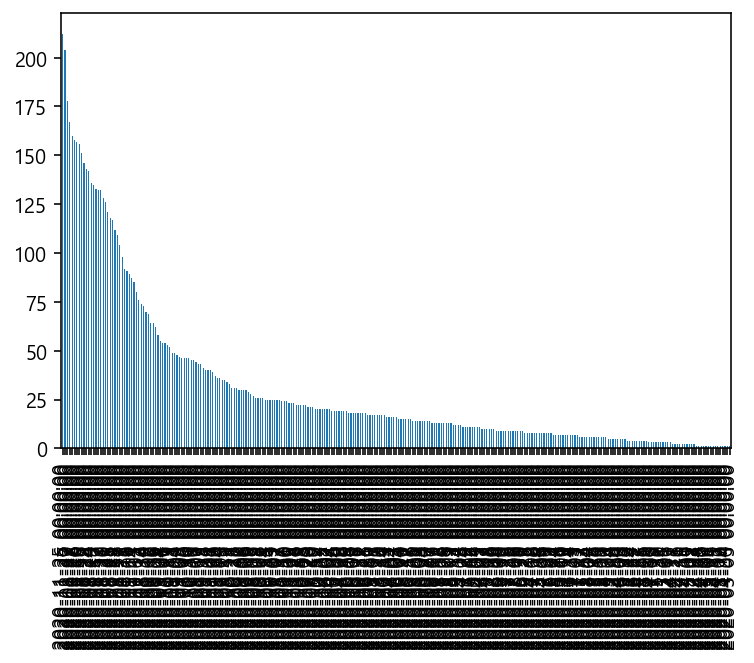

In [37]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.
df["확진일자"].value_counts().plot.bar()  #bar plot은 처음 지정한 빈도 수 순서대로, 모든 값을 표기한다.

<AxesSubplot:>

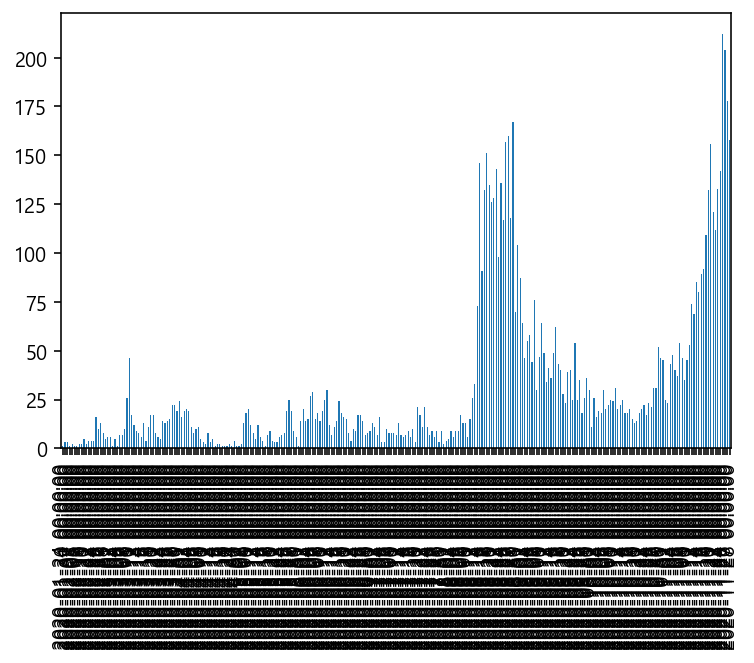

In [43]:
#날짜로 정렬
df["확진일자"].value_counts().sort_index().plot.bar() 

In [ ]:
# 막대그래프틑 데이터를 범주형이라고 인식함, 빈도수로 자동 정렬
# 연속된 수치 데이터는 선그래프로 그리는게 좋을수 있음

### 최근 데이터만 슬라이싱으로 나눠 그리기

<AxesSubplot:>

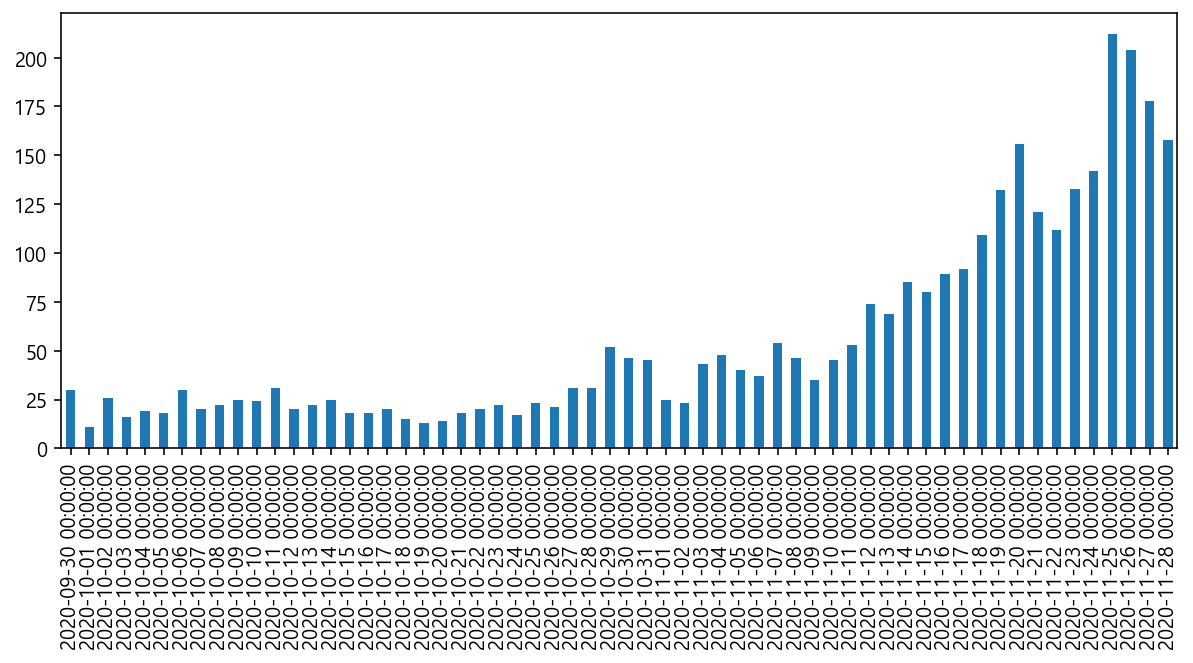

In [48]:
# 슬라이싱을 통해 최근 데이터만 그립니다.
day_count = df["확진일자"].value_counts().sort_index()
day_count[-60:].plot.bar(figsize = (10,4))

<AxesSubplot:>

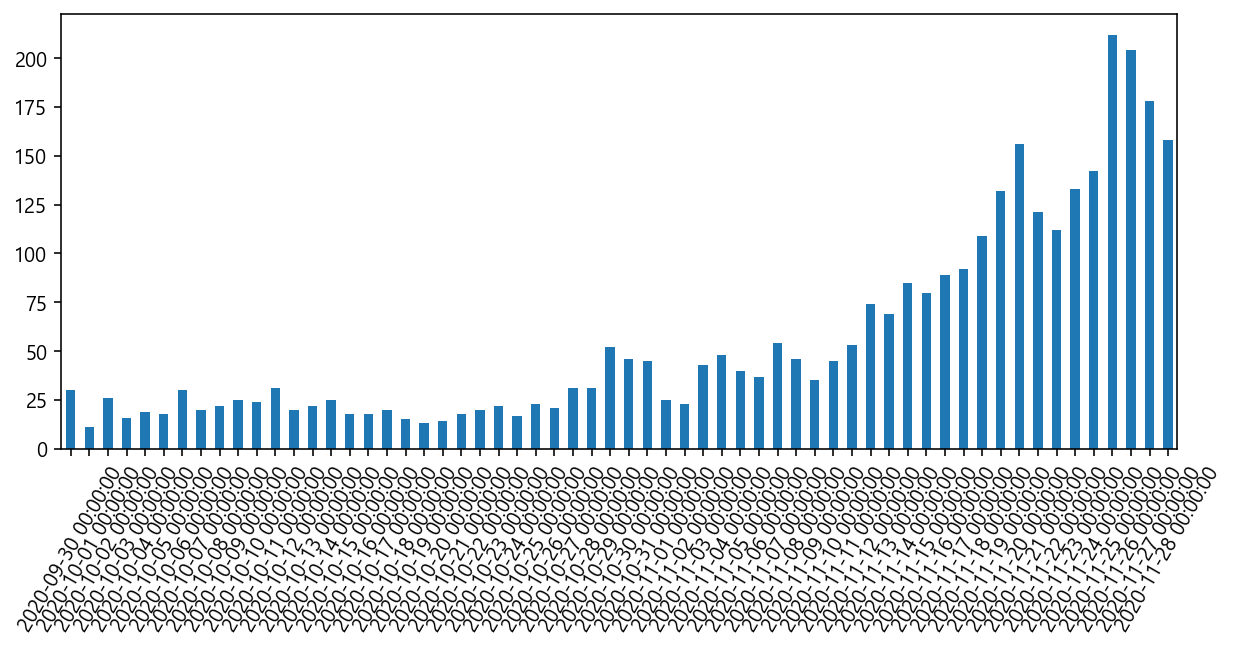

In [46]:
##rot로 라벨 텍스트 기울기 설정해줄 수 있음
# 라벨값 조정하려면 matplotlib에서 설정을 일일이 조정해줘야 함
# plotly로 비교적 손쉽게 인터랙티브 시각화도 가능
day_count[-60:].plot.bar(figsize = (10,4), rot = 60)

### 월별 확진자 수 그리기

<AxesSubplot:title={'center':'월별 확진자 수'}>

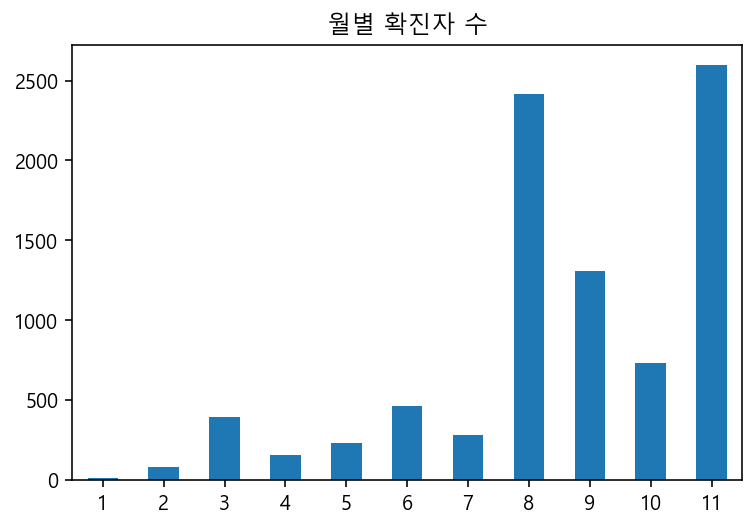

In [44]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.
df["월"].value_counts().sort_index().plot.bar(rot=0, title="월별 확진자 수")


### 주단위 확진자수 그리기

In [ ]:
# 주별로 빈도수를 구합니다.


In [ ]:
# 주단위 빈도수 막대그래프로 그리기


## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [54]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1]["확진일자"]

In [55]:
last_day = df.iloc[0]["확진일자"]

In [57]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days= pd.date_range(first_day, last_day)

In [58]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()
# df_days
df_days=days.to_frame()

In [59]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts().sort_index()
daily_case

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2020-11-24    142
2020-11-25    212
2020-11-26    204
2020-11-27    178
2020-11-28    158
Name: 확진일자, Length: 281, dtype: int64

In [60]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
df_daily_case = daily_case.reset_index()


In [61]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기
df_daily_case.columns = ["확진일자", "확진수"]
df_daily_case

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
276,2020-11-24,142
277,2020-11-25,212
278,2020-11-26,204
279,2020-11-27,178


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [64]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
# all_day
all_day = df_days.merge(df_daily_case, left_on=df_days.index, right_on="확진일자", how="left")
all_day = all_day.drop(0,axis=1)
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
305,2020-11-24,142.0
306,2020-11-25,212.0
307,2020-11-26,204.0
308,2020-11-27,178.0


## 누적 확진자 수 구하기

In [69]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.
all_day = all_day.fillna(0)
all_day

,확진일자,확진수,일자,누적확진
0,2020-01-24,1.0,01-24,1.0
1,2020-01-25,0.0,01-25,0.0
2,2020-01-26,0.0,01-26,0.0
3,2020-01-27,0.0,01-27,0.0
4,2020-01-28,0.0,01-28,0.0
...,...,...,...,...
305,2020-11-24,142.0,11-24,7900.0
306,2020-11-25,212.0,11-25,8112.0
307,2020-11-26,204.0,11-26,8316.0
308,2020-11-27,178.0,11-27,8494.0


In [70]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기
all_day["일자"]=all_day["확진일자"].astype(str).str[-5:]

In [71]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
# cum_day
all_day["누적확진"]=all_day["확진수"].cumsum()
all_day.head(20)

,확진일자,확진수,일자,누적확진
0,2020-01-24,1.0,01-24,1.0
1,2020-01-25,0.0,01-25,1.0
2,2020-01-26,0.0,01-26,1.0
3,2020-01-27,0.0,01-27,1.0
4,2020-01-28,0.0,01-28,1.0
5,2020-01-29,0.0,01-29,1.0
6,2020-01-30,3.0,01-30,4.0
7,2020-01-31,3.0,01-31,7.0
8,2020-02-01,0.0,02-01,7.0
9,2020-02-02,1.0,02-02,8.0


### 데이터프레임으로 그리기

<AxesSubplot:title={'center':'확진수와 누적확진 수'}, xlabel='확진일자'>

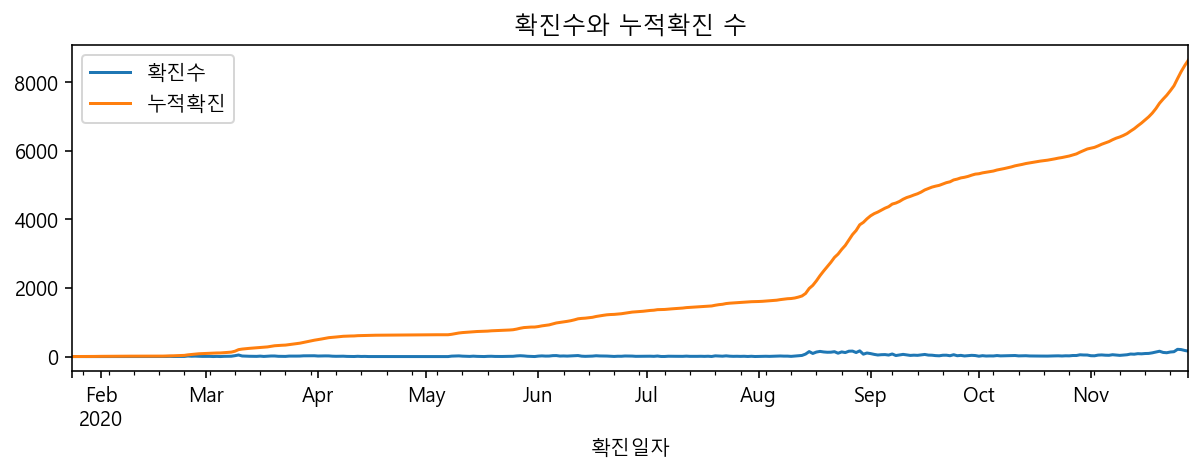

In [72]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.
all_day.set_index("확진일자")[["확진수","누적확진"]].plot(figsize=(10,3), title = "확진수와 누적확진 수")
#두 변수의 scale 차이가 많이 나기 때문에 적절한 시각화 방법은 아니다. log변환도 대안. 

<AxesSubplot:title={'center':'확진수와 누적확진 수'}, xlabel='확진일자'>

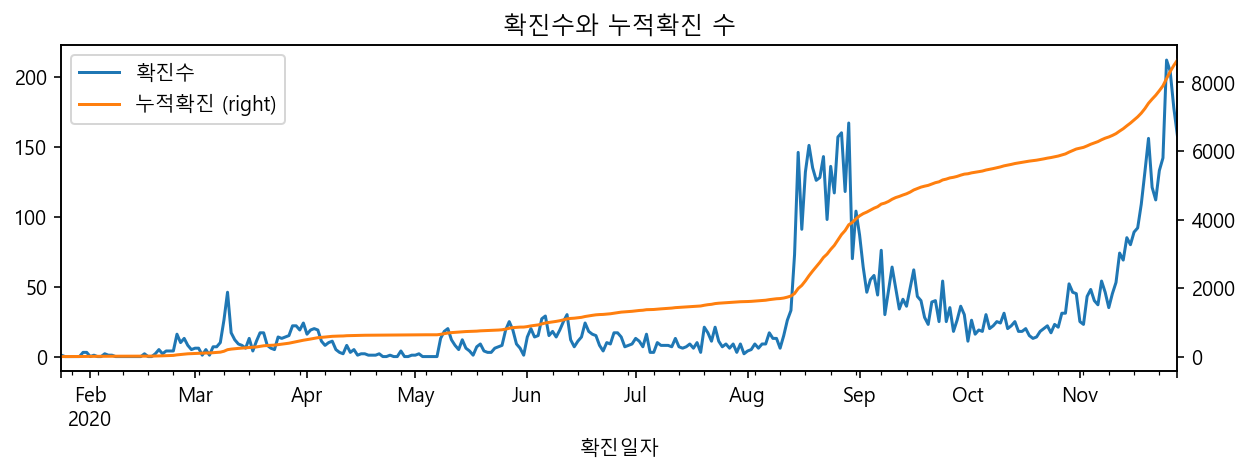

In [76]:
# 2번째 y값의 축변환으로 시각화 내에서 scale을 맞춰주는 방법
all_day.set_index("확진일자")[["확진수","누적확진"]].plot(figsize=(10,3), 
                                                     title = "확진수와 누적확진 수",
                                                     secondary_y = "누적확진")

### 시리즈로 그리기

<AxesSubplot:xlabel='확진일자'>

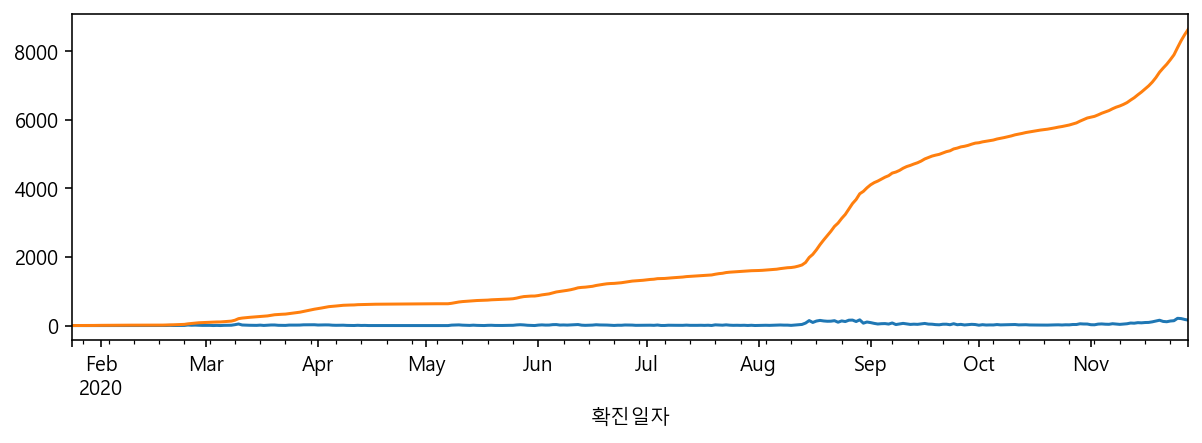

In [75]:
# 시리즈로 2개의 그래프 그리기
all_day.set_index("확진일자")["확진수"].plot(figsize=(10,3))
all_day.set_index("확진일자")["누적확진"].plot()

### 확진수만 따로 그리기

<AxesSubplot:>

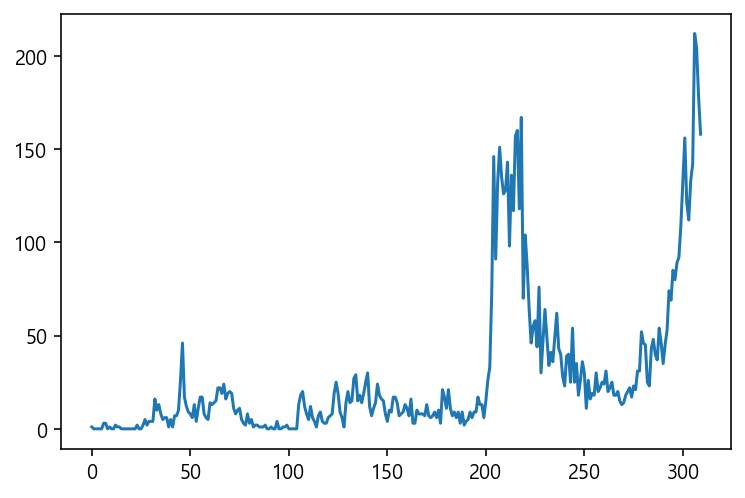

In [80]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
all_day["확진수"].plot() #어떤 값을 기준으로 시각화 해줄 것인지 index set을 해줘야 x축에 표기된다 

<AxesSubplot:xlabel='확진일자'>

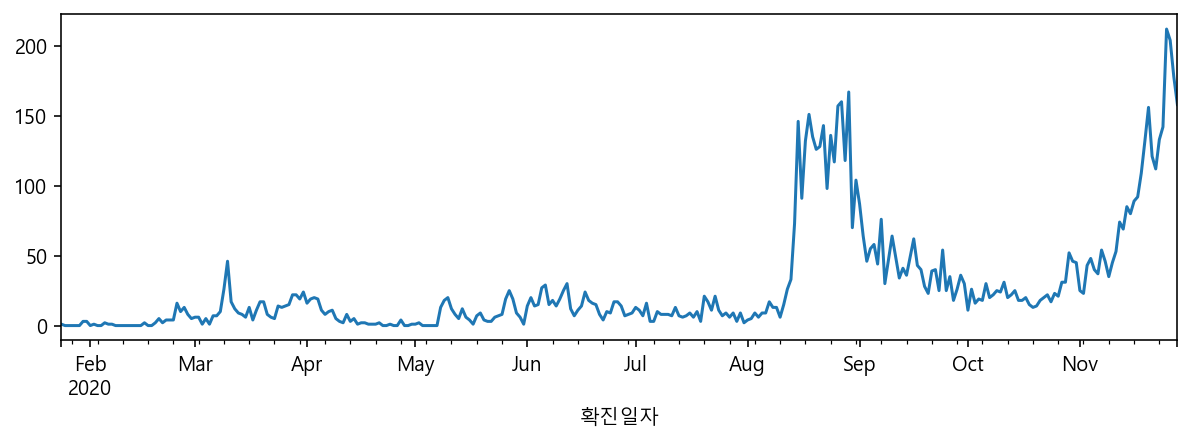

In [77]:
#set_index
all_day.set_index("확진일자")["확진수"].plot(figsize=(10,3))

### 누적확진만 따로 그리기

<AxesSubplot:xlabel='확진일자'>

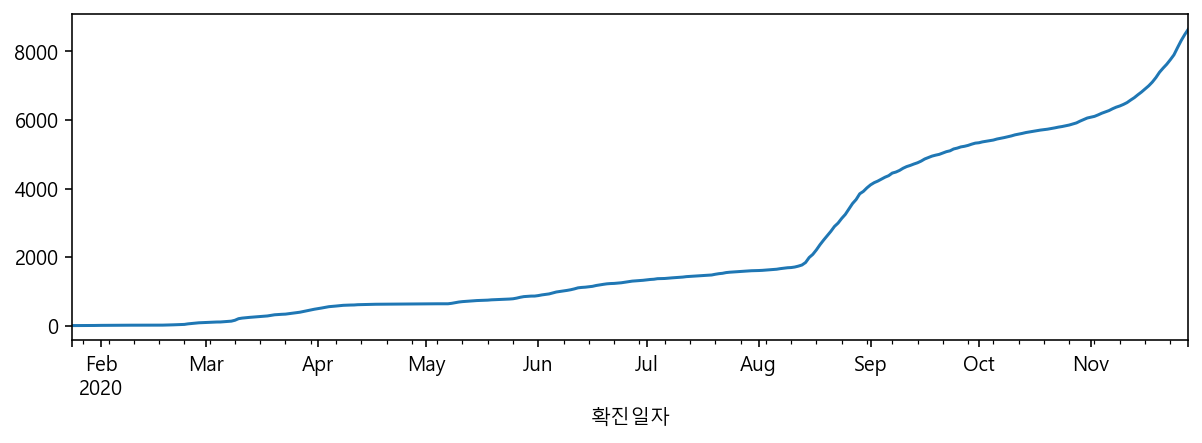

In [78]:
# 누적확진만 따로 그립니다.
all_day.set_index("확진일자")["누적확진"].plot(figsize=(10,3))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

In [81]:
all_day = all_day.set_index("확진일자")
all_day

,확진수,일자,누적확진
확진일자,,,
2020-01-24,1.0,01-24,1.0
2020-01-25,0.0,01-25,1.0
2020-01-26,0.0,01-26,1.0
2020-01-27,0.0,01-27,1.0
2020-01-28,0.0,01-28,1.0
...,...,...,...
2020-11-24,142.0,11-24,7900.0
2020-11-25,212.0,11-25,8112.0
2020-11-26,204.0,11-26,8316.0


array([[<AxesSubplot:title={'center':'확진수'}>,
        <AxesSubplot:title={'center':'누적확진'}>]], dtype=object)

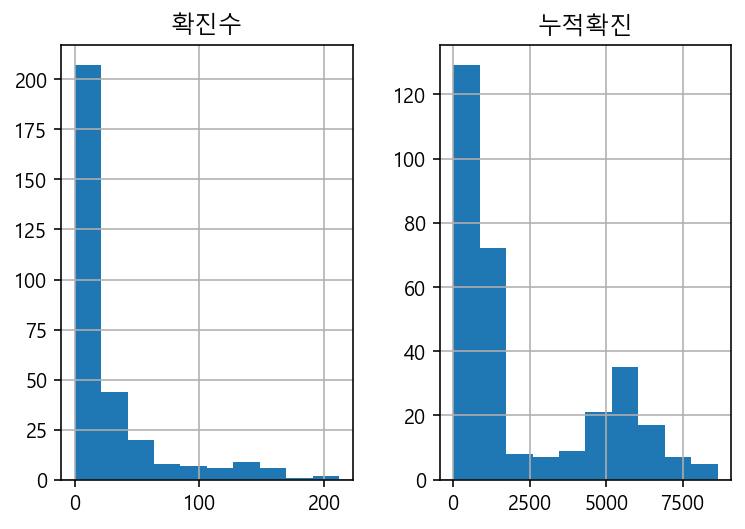

In [85]:
all_day.hist()

<AxesSubplot:>

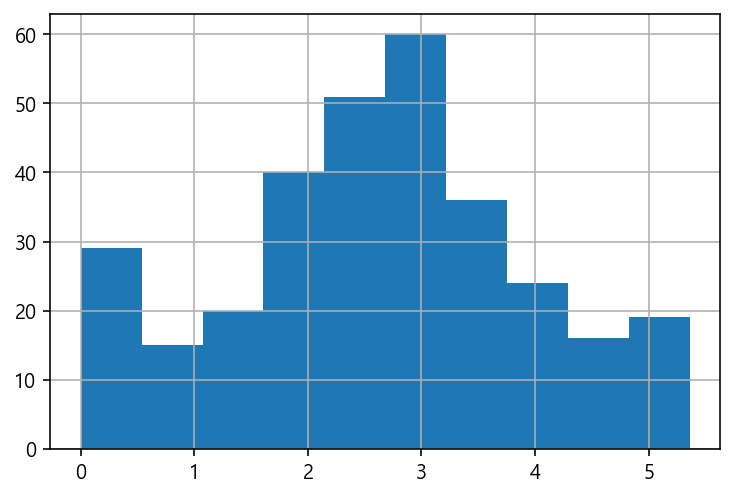

In [86]:
#log변환을 통해 데이터의 분포를 고르게 만들어준다
np.log1p(all_day["확진수"]).hist()

<AxesSubplot:xlabel='확진일자'>

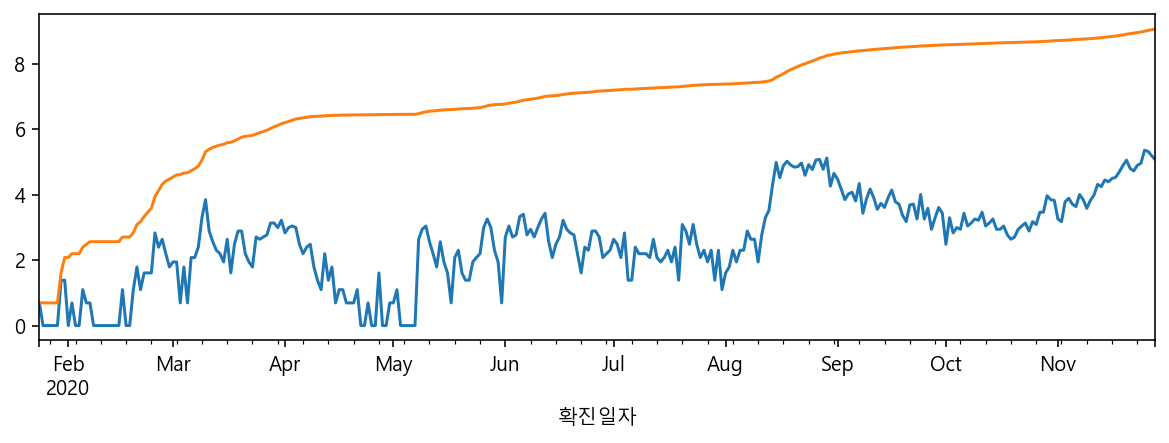

In [84]:
#np.log(all_day["확진수"]+1)
np.log1p(all_day["확진수"]).plot()
np.log1p(all_day["누적확진"]).plot(figsize=(10,3))

## 확진월과 요일 구하기

In [90]:
# cum_day
# all_day
df_all_day = all_day.reset_index()
df_all_day["월"] =df_all_day["확진일자"].dt.month
df_all_day["요일"] = df_all_day["확진일자"].dt.dayofweek

In [91]:
df_all_day.groupby("월")["확진수"].sum()

월
1        7.0
2       80.0
3      391.0
4      156.0
5      228.0
6      460.0
7      281.0
8     2417.0
9     1304.0
10     733.0
11    2595.0
Name: 확진수, dtype: float64

### 요일별 확진 수 

In [92]:
# 요일별 확진수를 groupby로 구하기
# all_day_week
df_all_day.groupby("요일")["확진수"].sum()   #0:월 ~6:일

요일
0    1124.0
1    1217.0
2    1301.0
3    1368.0
4    1327.0
5    1390.0
6     925.0
Name: 확진수, dtype: float64

In [98]:
# 월별, 요일별 확진수를 groupby로 구하기
# all_day_week
all_day_week = df_all_day.groupby(["월","요일"])["확진수"].sum().unstack()   
                    #unstack: 마지막 인덱스 값을 컬럼으로 펼쳐줌
                    #속도면에서는 피벗테이블보다 그룹바이가 더 좋다. 
all_day_week

요일,0,1,2,3,4,5,6
월,,,,,,,
1,0.0,0.0,0.0,3.0,4.0,0.0,0.0
2,4.0,16.0,14.0,19.0,11.0,9.0,7.0
3,69.0,89.0,46.0,44.0,48.0,45.0,50.0
4,16.0,17.0,28.0,27.0,26.0,22.0,20.0
5,27.0,36.0,34.0,34.0,32.0,36.0,29.0
6,55.0,67.0,66.0,75.0,90.0,70.0,37.0
7,37.0,42.0,42.0,58.0,34.0,40.0,28.0
8,387.0,289.0,327.0,328.0,336.0,473.0,277.0
9,177.0,242.0,228.0,207.0,169.0,155.0,126.0


In [96]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [102]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
월,,,,,,,
1,0.0,0.0,0.0,3.0,4.0,0.0,0.0
2,4.0,16.0,14.0,19.0,11.0,9.0,7.0
3,69.0,89.0,46.0,44.0,48.0,45.0,50.0
4,16.0,17.0,28.0,27.0,26.0,22.0,20.0
5,27.0,36.0,34.0,34.0,32.0,36.0,29.0
6,55.0,67.0,66.0,75.0,90.0,70.0,37.0
7,37.0,42.0,42.0,58.0,34.0,40.0,28.0
8,387.0,289.0,327.0,328.0,336.0,473.0,277.0
9,177.0,242.0,228.0,207.0,169.0,155.0,126.0


In [103]:
# style.background_gradient 로 색상을 표현합니다.
all_day_week.astype(int).style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


In [104]:
#행열전환: 스타일 앞에 T
all_day_week.astype(int).T.style.background_gradient(cmap="Blues")

월,1,2,3,4,5,6,7,8,9,10,11
월,0,4,69,16,27,55,37,387,177,72,280
화,0,16,89,17,36,67,42,289,242,97,322
수,0,14,46,28,34,66,42,327,228,94,422
목,3,19,44,27,34,75,58,328,207,123,450
금,4,11,48,26,32,90,34,336,169,137,440
토,0,9,45,22,36,70,40,473,155,122,418
일,0,7,50,20,29,37,28,277,126,88,263


## 거주지별 확진자

In [106]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.
# gu_count
gu_count = df["거주지"].value_counts()

<AxesSubplot:title={'center':'구별 확진자 수'}>

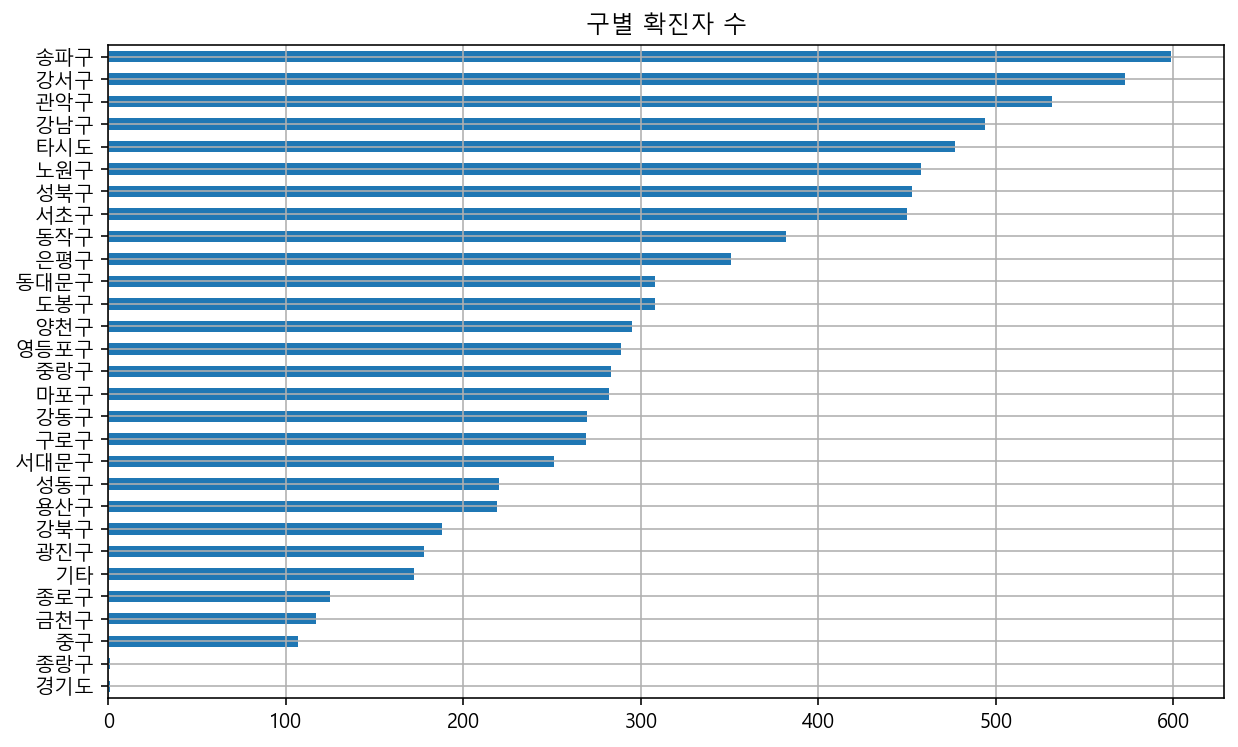

In [109]:
# 구별 확진자의 수를 시각화 합니다.
gu_count.sort_values().plot.barh(title = "구별 확진자 수", figsize=(10,6),grid=True )   #barh 세로 막대그래프

In [110]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.
gu_count.index

Index(['송파구', '강서구', '관악구', '강남구', '타시도', '노원구', '성북구', '서초구', '동작구', '은평구',
       '동대문구', '도봉구', '양천구', '영등포구', '중랑구', '마포구', '강동구', '구로구', '서대문구', '성동구',
       '용산구', '강북구', '광진구', '기타', '종로구', '금천구', '중구', '종랑구', '경기도'],
      dtype='object')

In [114]:
gu = gu_count.index.tolist()
gu.remove("경기도")
gu.remove("타시도")
gu.remove("기타")
gu

['송파구',
 '강서구',
 '관악구',
 '강남구',
 '노원구',
 '성북구',
 '서초구',
 '동작구',
 '은평구',
 '동대문구',
 '도봉구',
 '양천구',
 '영등포구',
 '중랑구',
 '마포구',
 '강동구',
 '구로구',
 '서대문구',
 '성동구',
 '용산구',
 '강북구',
 '광진구',
 '종로구',
 '금천구',
 '중구',
 '종랑구']

In [115]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.

set(gu_count.index) - set(gu)

{'경기도', '기타', '타시도'}

In [117]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

df_gu = gu_count.reset_index()
df_gu.columns = ["구","거주지"]
df_gu

,구,거주지
0,송파구,599
1,강서구,573
2,관악구,532
3,강남구,494
4,타시도,477
5,노원구,458
6,성북구,453
7,서초구,450
8,동작구,382
9,은평구,351


In [118]:
#isin([찾고자하는 리스트값])
#- 표시는 not을 의미
df_gu[~df_gu["구"].isin(gu)]

,구,거주지
4,타시도,477
23,기타,172
28,경기도,1


In [121]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
# df.loc[~df["거주지"].isin(gu)]
# df.loc[df["지역"].isnull(), "지역"] = "타지역"
df_gu.loc[df_gu["구"] == "종랑구", "구"] = "중랑구"
df_gu.loc[df_gu["구"] == "타시도", "구"] = "타시도"
df_gu.loc[df_gu["구"] == "기타", "구"] = "타시도"
df_gu.loc[df_gu["구"] == "경기도", "구"] = "타시도"

In [120]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
# df["지역"]
df.loc[df["지역"] == "종랑구", "지역"] = "중랑구"
df.loc[df["지역"] == "타시도", "지역"] = "타시도"
df.loc[df["지역"] == "기타", "지역"] = "타시도"
df.loc[df["지역"] == "경기도", "지역"] = "타시도"

KeyError: '지역'

In [ ]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.
# gu_etc_count


In [ ]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.


## 접촉력

In [122]:
# 접촉력 빈도수를 구합니다.


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
4694,3958,20163,8.31.,양천구,-,확인 중,퇴원,2020-08-31,8,36
4695,3957,20141,8.31.,은평구,-,확인 중,퇴원,2020-08-31,8,36
4696,3956,20159,8.31.,용산구,-,확인 중,퇴원,2020-08-31,8,36
4700,3952,20130,8.31.,도봉구,-,확인 중,퇴원,2020-08-31,8,36
4706,3946,20039,8.31.,타시도,-,확인 중,퇴원,2020-08-31,8,36
...,...,...,...,...,...,...,...,...,...,...
8596,56,1768,2.25.,은평구,-,확인중,퇴원,2020-02-25,2,9
8610,42,1370,2.25.,송파구,-,확인중,퇴원,2020-02-25,2,9
8613,39,924,2.25.,금천구,-,확인중,퇴원,2020-02-25,2,9
8614,38,907,2.25.,타시도,-,확인중,퇴원,2020-02-25,2,9


In [ ]:
# 접촉력의 unique 값만 구합니다.


In [123]:
# "확인" 이 들어가는 접촉력만 찾습니다.
df[df["접촉력"].str.contains("확인")]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
4694,3958,20163,8.31.,양천구,-,확인 중,퇴원,2020-08-31,8,36
4695,3957,20141,8.31.,은평구,-,확인 중,퇴원,2020-08-31,8,36
4696,3956,20159,8.31.,용산구,-,확인 중,퇴원,2020-08-31,8,36
4700,3952,20130,8.31.,도봉구,-,확인 중,퇴원,2020-08-31,8,36
4706,3946,20039,8.31.,타시도,-,확인 중,퇴원,2020-08-31,8,36
...,...,...,...,...,...,...,...,...,...,...
8596,56,1768,2.25.,은평구,-,확인중,퇴원,2020-02-25,2,9
8610,42,1370,2.25.,송파구,-,확인중,퇴원,2020-02-25,2,9
8613,39,924,2.25.,금천구,-,확인중,퇴원,2020-02-25,2,9
8614,38,907,2.25.,타시도,-,확인중,퇴원,2020-02-25,2,9


In [126]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.
df.loc[df["접촉력"].str.contains("확인|조사"),"접촉력"]="확인 중"

In [127]:
# "확인" 이 들어가는 접촉력만 찾습니다.
df[df["접촉력"].str.contains("확인")]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
1,8651,33756,11.28.,타시도,-,확인 중,NaN,2020-11-28,11,48
5,8647,33769,11.28.,서초구,-,확인 중,NaN,2020-11-28,11,48
10,8642,33764,11.28.,서초구,-,확인 중,NaN,2020-11-28,11,48
18,8634,33733,11.28.,양천구,-,확인 중,NaN,2020-11-28,11,48
35,8617,33726,11.28.,강남구,-,확인 중,NaN,2020-11-28,11,48
...,...,...,...,...,...,...,...,...,...,...
8596,56,1768,2.25.,은평구,-,확인 중,퇴원,2020-02-25,2,9
8610,42,1370,2.25.,송파구,-,확인 중,퇴원,2020-02-25,2,9
8613,39,924,2.25.,금천구,-,확인 중,퇴원,2020-02-25,2,9
8614,38,907,2.25.,타시도,-,확인 중,퇴원,2020-02-25,2,9


In [128]:
# 접촉력 빈도수를 시각화 합니다.

contact_count = df["접촉력"].value_counts()

In [ ]:
# 상위 15개만 구합니다.
# top_contact


In [ ]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.


In [ ]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.
# top_group


In [ ]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.


### 감염경로 불명

In [ ]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.

# df_unknown


In [ ]:
# 감염경로 불명이 어느정도인지 봅니다.
# unknown_weekly_case


In [ ]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# all_weekly_case


In [ ]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# unknown_weekly_case


In [ ]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

# unknown_case


In [ ]:
# 위에서 구한 결과를 시각화 합니다.


In [ ]:
# 감염경로 "확인 중"의 주별 비율

# unknown_case


## 조치사항

In [ ]:
df

## 퇴원, 사망여부

In [ ]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.


In [ ]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수



In [ ]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.


In [ ]:
# 사망여부에 따른 빈도수를 구합니다.


In [ ]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.


## 여행력

In [ ]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
# df["해외"]


In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수


### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [ ]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.
# df_oversea


In [ ]:
# 중복되는 지역명이 있는지 확인합니다.


### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [ ]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe


In [ ]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america

In [ ]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea["해외"].value_counts()

In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수


In [ ]:
# 확진일자, 해외 별 카운트 수를 구합니다.

# day_oversea


In [ ]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.

# day_oversea


In [ ]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.

# df_day_oversea


In [ ]:
# "해외" 컬럼의 빈도수를 구합니다.


In [ ]:
# 위에서 구한 빈도수를 시각화 합니다.


In [ ]:
# 확진일자, 해외 별 누적확진 수


In [ ]:
# 확진일자별 누적확진 수



In [ ]:
# "해외유입 구별 확진자" 시각화 하기



### 전체확진수와 해외유입 확진수 비교

In [ ]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기


In [ ]:
# 데이터프레임으로 변환하고 컬럼명 변경하기


In [ ]:
# 해외유입확진수 구하기


### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [ ]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기

# df_all_oversea_case


In [ ]:
# 시각화 하기


In [ ]:
# df_all_oversea_case["해외유입비율"] 구하기


### 해외유입 확진자 중 퇴원 여부

In [ ]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기


### 월별 해외 확진자 수

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

#### crosstab 으로 빈도수 구하기

#### pivot_table 로 빈도수 구하기

In [ ]:
pd.options.display.max_columns = 30

### 해외유입이 많은 지역(구)

In [ ]:
# 해외유입이 많은 상위 10개 지역을 구합니다.


In [ ]:
# 시각화 하기


* 범례 위치 조정하기 : [matplotlib.pyplot.legend — Matplotlib 3.1.2 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

In [ ]:
group_oversea_gu


#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

In [ ]:
group_oversea_gu


#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [ ]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?


In [ ]:
# top_oversea_gu 에 따른 확진수 보기


### 최근 데이터를 불러와 실습해 보기
* 이 실습을 진행하고 계신 여러분들은 이 시점보다 미래에 있겠죠?
* 같은 내용의 실습을 최근 데이터로 해보세요!